In [42]:
from pyspedas import mms_load_fpi
from pytplot import tplot, get_data, store_data, tlimit, options
from pyspedas.mms import fpi,fgm
from pyspedas.mms.mms_orbit_plot import mms_orbit_plot
from pyspedas import tinterpol # interpolate tplot variables
import pyspedas

import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import pandas as pd
plt.rcParams['font.size'] = 12
%matplotlib inline
from scipy.interpolate import interp1d

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
cmap = plt.cm.inferno
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

warnings.filterwarnings("ignore", category=UserWarning) 

#jupyter nbconvert --to webpdf velocity_B_field_MMS_vectors.ipynb


start_time = '2020-06-18T01:07:00.000000000'
end_time = '2020-06-18T01:15:00.000000000'

save_figs = True




# trange = ['2020-06-16/00:00:00','2020-06-19/00:00:00']
# #probe = ['1','2','3','4']
# probe = ['2']
# pos_data = pyspedas.mms.mec(trange=trange)
# ion_vars = mms_load_fpi(probe=probe,datatype='dis-moms',trange=trange)

# fgm_vars = fgm(trange=trange, probe=probe)
# feeps = pyspedas.mms.feeps(trange=trange)




# # mms1_pos = 'mms1_mec_r_gse'
# # times_p, p = get_data(mms1_pos)
# # P_arr = np.column_stack((times_p, p))
# # np.savetxt('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/MMS_data/MMS1_P.txt',P_arr,delimiter=',')


# # mms1_v = 'mms1_dis_bulkv_gse_fast'
# # times_v, v = get_data(mms1_v)
# # V_arr = np.column_stack((times_v, v))
# # np.savetxt('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/MMS_data/MMS1_V.txt',V_arr,delimiter=',')


# # mms1_b = 'mms1_fgm_b_gse_srvy_l2'
# # times_b, B = get_data(mms1_b)
# # B_arr = np.column_stack((times_b, B))
# # np.savetxt('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/MMS_data/MMS1_B.txt',B_arr,delimiter=',')
# tlimit(['2020-06-17/18:00:00','2020-06-18/06:00:00'])

# #tplot(['mms1_mec_r_gse', 'mms1_dis_bulkv_gse_fast','mms1_fgm_b_gse_srvy_l2'])

# tplot(['mms1_mec_r_gse','mms1_epd_feeps_srvy_l2_electron_intensity_omni_spin',
#        'mms1_dis_bulkv_gse_fast', 'mms1_dis_numberdensity_fast','mms1_dis_energyspectr_omni_fast',
#        'mms1_fgm_b_gse_srvy_l2_btot', 'mms1_fgm_b_gse_srvy_l2_bvec'])


In [43]:



# KH instabilities occured from trange = ['2020-06-17/20:00:00','2020-06-18/03:20:00']




## read files in as pandas dataframes

# B-field data downloaded using pyspedas routine fgm(..). Output is mms1_fgm_b_gse_srvy_l2_bvec. 
MMS1_b = pd.read_csv('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/MMS_data/MMS1_B.txt',
                     header=None,names=['Bt','Bx','By','Bz','Btot'])


#print(MMS1_b)

# mms1_mec_r_gse
MMS1_pos = pd.read_csv('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/MMS_data/MMS1_P.txt',
                       header=None,names=['Pt','Px','Py','Pz']) 
#print(MMS1_pos)

#'mms1_dis_bulkv_gse_brst'
MMS1_v = pd.read_csv('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/MMS_data/MMS1_V.txt',
                     header=None,names=['Vt','Vx','Vy','Vz']) 


# create a human-readable timestamp column 
MMS1_pos['timestamp'] = pd.to_datetime(MMS1_pos['Pt'],unit='s')
MMS1_b['timestamp'] = pd.to_datetime(MMS1_b['Bt'],unit='s')
MMS1_v['timestamp'] = pd.to_datetime(MMS1_v['Vt'],unit='s')

print(MMS1_v)
# # create arrays 
# Bt = np.array(MMS1_b['Bt'])
# MMS1_Bx = np.array(MMS1_b['Bx'])
# MMS1_By = np.array(MMS1_b['By'])
# MMS1_Bz = np.array(MMS1_b['Bz'])

# Vt = np.array(MMS1_v['Vt'])
# MMS1_Vx = np.array(MMS1_v['Vx'])
# MMS1_Vy = np.array(MMS1_v['Vy'])
# MMS1_Vz = np.array(MMS1_v['Vz'])


# Pt = np.array(MMS1_pos['Pt'])
# MMS1_Px = np.array(MMS1_pos['Px'])
# MMS1_Py = np.array(MMS1_pos['Py'])
# MMS1_Pz = np.array(MMS1_pos['Pz'])





                 Vt          Vx         Vy         Vz  \
0      1.592266e+09   17.421705  13.008783 -10.494087   
1      1.592266e+09   16.755676   7.467947  -9.606921   
2      1.592266e+09   26.508377   9.492604 -12.219824   
3      1.592266e+09   31.928707  11.183307 -10.233867   
4      1.592266e+09   23.483534   8.746970  -9.585997   
...             ...         ...        ...        ...   
28843  1.592525e+09 -222.857651 -28.350914 -33.584103   
28844  1.592525e+09 -222.514633 -25.019999 -34.748768   
28845  1.592525e+09 -226.108353 -24.979010 -36.392273   
28846  1.592525e+09 -224.948364 -32.255844 -35.335960   
28847  1.592525e+09 -225.774796 -29.028954 -37.722847   

                          timestamp  
0     2020-06-16 00:00:03.012412928  
1     2020-06-16 00:00:07.512442112  
2     2020-06-16 00:00:12.012476672  
3     2020-06-16 00:00:16.512505088  
4     2020-06-16 00:00:21.012539904  
...                             ...  
28843 2020-06-18 23:59:39.569442816  
28844 2020-

In [44]:



# set index to timestamp so you can use get_loc
MMS1_b = MMS1_b.set_index('timestamp')
MMS1_pos = MMS1_pos.set_index('timestamp')
MMS1_v = MMS1_v.set_index('timestamp')



index_st_B = MMS1_b.index.get_loc(start_time, method='nearest')
index_end_B  = MMS1_b.index.get_loc(end_time, method='nearest')


index_st_V = MMS1_v.index.get_loc(start_time, method='nearest')
index_end_V  = MMS1_v.index.get_loc(end_time, method='nearest')


index_st_P = MMS1_pos.index.get_loc(start_time, method='nearest')
index_end_P  = MMS1_pos.index.get_loc(end_time, method='nearest')





print('B_field start timestamp:',MMS1_b.index[MMS1_b.index.get_loc(start_time, method='nearest')])
print('B_field end timestamp:',MMS1_b.index[MMS1_b.index.get_loc(end_time, method='nearest')])
print('Position start timestamp:',MMS1_pos.index[MMS1_pos.index.get_loc(start_time, method='nearest')])
print('Position end timestamp:',MMS1_pos.index[MMS1_pos.index.get_loc(end_time, method='nearest')])
print('Velocity start timestamp:',MMS1_v.index[MMS1_v.index.get_loc(start_time, method='nearest')])
print('Velocity end timestamp:',MMS1_v.index[MMS1_v.index.get_loc(end_time, method='nearest')])

print('B_field start index:',MMS1_b.index.get_loc(start_time, method='nearest'))
print('B_field end index:',MMS1_b.index.get_loc(end_time, method='nearest'))
print('Position start index:',MMS1_pos.index.get_loc(start_time, method='nearest'))
print('Position end index:',MMS1_pos.index.get_loc(end_time, method='nearest'))
print('Velocity start index:',MMS1_v.index.get_loc(start_time, method='nearest'))
print('Velocity end index:',MMS1_v.index.get_loc(end_time, method='nearest'))








# # Pt_short = Pt[index_st_P:index_end_P]
# # Px_short = MMS1_Px[index_st_P:index_end_P]
# # Py_short = MMS1_Py[index_st_P:index_end_P]
# # Pz_short = MMS1_Pz[index_st_P:index_end_P]
# # Pt_short_timestamp = pd.to_datetime(Pt_short,unit='s')

# # Bt_short = Bt[index_st_B:index_end_B]
# #Bt_short_timestamp = datetime.datetime.fromtimestamp(Bt_short)
# Bx_short = MMS1_b['Bx'][index_st_B:index_end_B]
# # By_short = MMS1_By[index_st_B:index_end_B]
# # Bz_short = MMS1_Bz[index_st_B:index_end_B]

# # Vt_short = Vt[index_st_V:index_end_V]
# # #Vt_short_timestamp = datetime.datetime.fromtimestamp(Vt_short)
# # Vx_short = MMS1_Vx[index_st_V:index_end_V]
# # Vy_short = MMS1_Vy[index_st_V:index_end_V]
# # Vz_short = MMS1_Vz[index_st_V:index_end_V]

Pt_short = MMS1_pos['Pt'][index_st_P:index_end_P]
Pt_short_timestamp = pd.to_datetime(Pt_short,unit='s')
Px_short = MMS1_pos['Px'][index_st_P:index_end_P]
Py_short = MMS1_pos['Py'][index_st_P:index_end_P]
Pz_short = MMS1_pos['Pz'][index_st_P:index_end_P]

Bt_short = MMS1_b['Bt'][index_st_B:index_end_B]
Bt_short_timestamp = pd.to_datetime(Bt_short,unit='s')
Bx_short = MMS1_b['Bx'][index_st_B:index_end_B]
By_short = MMS1_b['By'][index_st_B:index_end_B]
Bz_short = MMS1_b['Bz'][index_st_B:index_end_B]


Vt_short = MMS1_v['Vt'][index_st_V:index_end_V]
Vt_short_timestamp = pd.to_datetime(Vt_short,unit='s')
Vx_short = MMS1_v['Vx'][index_st_V:index_end_V]
Vy_short = MMS1_v['Vy'][index_st_V:index_end_V]
Vz_short = MMS1_v['Vz'][index_st_V:index_end_V]


print('average time step in position data (s):',np.mean(Pt_short[1:-1]-Pt_short[0:-2]))
print('average time step in B-field data (s):',np.mean(Bt_short[1:-1]-Bt_short[0:-2]))
print('average time step in velocity data (s):',np.mean(Vt_short[1:-1]-Vt_short[0:-2]))

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return int(idx)

#initialize arrays
closest_indices_B = np.zeros((len(Pt_short)))
closest_Btime = []

closest_indices_V = np.zeros((len(Pt_short)))
closest_Vtime = []



# for each position timestamp, find the closest velocity/B-field timestamp, save that index
for t in range(len(Pt_short)):
    idx_B = find_nearest(Bt_short, Pt_short[t])
    closest_indices_B[t] = idx_B
    
    idx_V = find_nearest(Vt_short, Pt_short[t])
    closest_indices_V[t] = idx_V
    
    closest_Btime.append(datetime.datetime.fromtimestamp(Bt_short[idx_B]).strftime('%Y-%m-%d %H:%M:%S'))
    closest_Vtime.append(datetime.datetime.fromtimestamp(Vt_short[idx_V]).strftime('%Y-%m-%d %H:%M:%S'))

    
    
# make sure the indices are integers. 
closest_indices_B = closest_indices_B.astype(int)
closest_indices_V = closest_indices_V.astype(int)


print('length of shortened position data array',len(Pt_short))
print('length of shortened B-field data array',len(Bt_short))
print('length of shortened velocity data array',len(Vt_short))



#print(closest_indices_V)

B_field start timestamp: 2020-06-17 22:30:00.009955840
B_field end timestamp: 2020-06-18 00:29:59.975525120
Position start timestamp: 2020-06-17 22:30:00
Position end timestamp: 2020-06-18 00:30:00
Velocity start timestamp: 2020-06-17 22:30:01.420743936
Velocity end timestamp: 2020-06-18 00:30:01.472325888
B_field start index: 2679303
B_field end index: 2794501
Position start index: 5580
Position end index: 5820
Velocity start index: 18406
Velocity end index: 20006
average time step in position data (s): 0.0
average time step in B-field data (s): 0.0
average time step in velocity data (s): 0.0
length of shortened position data array 240
length of shortened B-field data array 115198
length of shortened velocity data array 1600


In [45]:



R_E = 6371     #divide by earth's radius


# Vx3,By3, etc are the data array for the shortened time period that match the position data cadence 
Vx3 = Vx_short[closest_indices_V]
Vy3 = Vy_short[closest_indices_V]
Vz3 = Vz_short[closest_indices_V]

Bx3 = Bx_short[closest_indices_B]
By3 = By_short[closest_indices_B]
Bz3 = Bz_short[closest_indices_B]


# Px3 = Px_short/R_E
# Py3 = Py_short/R_E
# Pz3 = Pz_short/R_E

Px3 = Px_short
Py3 = Py_short
Pz3 = Pz_short


print('max of Px3:',max(Px3))
print('max of Py3:',max(Py3))
print('max of Pz3:',max(Pz3))

print('\n')
print('range of Px3:', max(Px3)-min(Px3))
print('range of Py3:', max(Py3)-min(Py3))
print('range of Pz3:', max(Px3)-min(Pz3))


print('\n')
print('min of Px3:',min(Px3))
print('min of Py3:',min(Py3))
print('min of Pz3:',min(Pz3))
print('\n')

print('max of Vx3:',max(Vx3))
print('max of Vy3:',max(Vy3))
print('max of Vz3:',max(Vz3))

print('\n')
print('min of Vx3:',min(Vx3))
print('min of Vy3:',min(Vy3))
print('min of Vz3:',min(Vz3))

print('\n')
print('range of Vx3:', max(Vx3)-min(Vx3))
print('range of Vy3:', max(Vy3)-min(Vy3))
print('range of Vz3:', max(Vx3)-min(Vz3))

print('\n')
print('max of Bx3:',max(Bx3))
print('max of By3:',max(By3))
print('max of Bz3:',max(Bz3))

print('\n')
print('min of Bx3:',min(Bx3))
print('min of By3:',min(By3))
print('min of Bz3:',min(Bz3))

print('\n')
print('range of Bx3:', max(Bx3)-min(Bx3))
print('range of By3:', max(By3)-min(By3))
print('range of Bz3:', max(Bx3)-min(Bz3))


max of Px3: -118492.82607897528
max of Py3: -123911.99024078078
max of Pz3: 31107.595410805923


range of Px3: 72.36406750028254
range of Py3: 3971.127967204171
range of Pz3: -147255.41703949502


min of Px3: -118565.19014647556
min of Py3: -127883.11820798495
min of Pz3: 28762.590960519752


max of Vx3: 39.600582122802734
max of Vy3: 94.79297637939453
max of Vz3: 122.4162139892578


min of Vx3: -227.55311584472656
min of Vy3: -78.75420379638672
min of Vz3: -81.43367767333984


range of Vx3: 267.1536979675293
range of Vy3: 173.54718017578125
range of Vz3: 121.03425979614258


max of Bx3: 12.854147911071776
max of By3: 6.910388469696045
max of Bz3: 12.083704948425291


min of Bx3: -4.279316425323486
min of By3: -4.773929595947266
min of Bz3: 0.3886258006095886


range of Bx3: 17.133464336395264
range of By3: 11.68431806564331
range of Bz3: 12.465522110462187


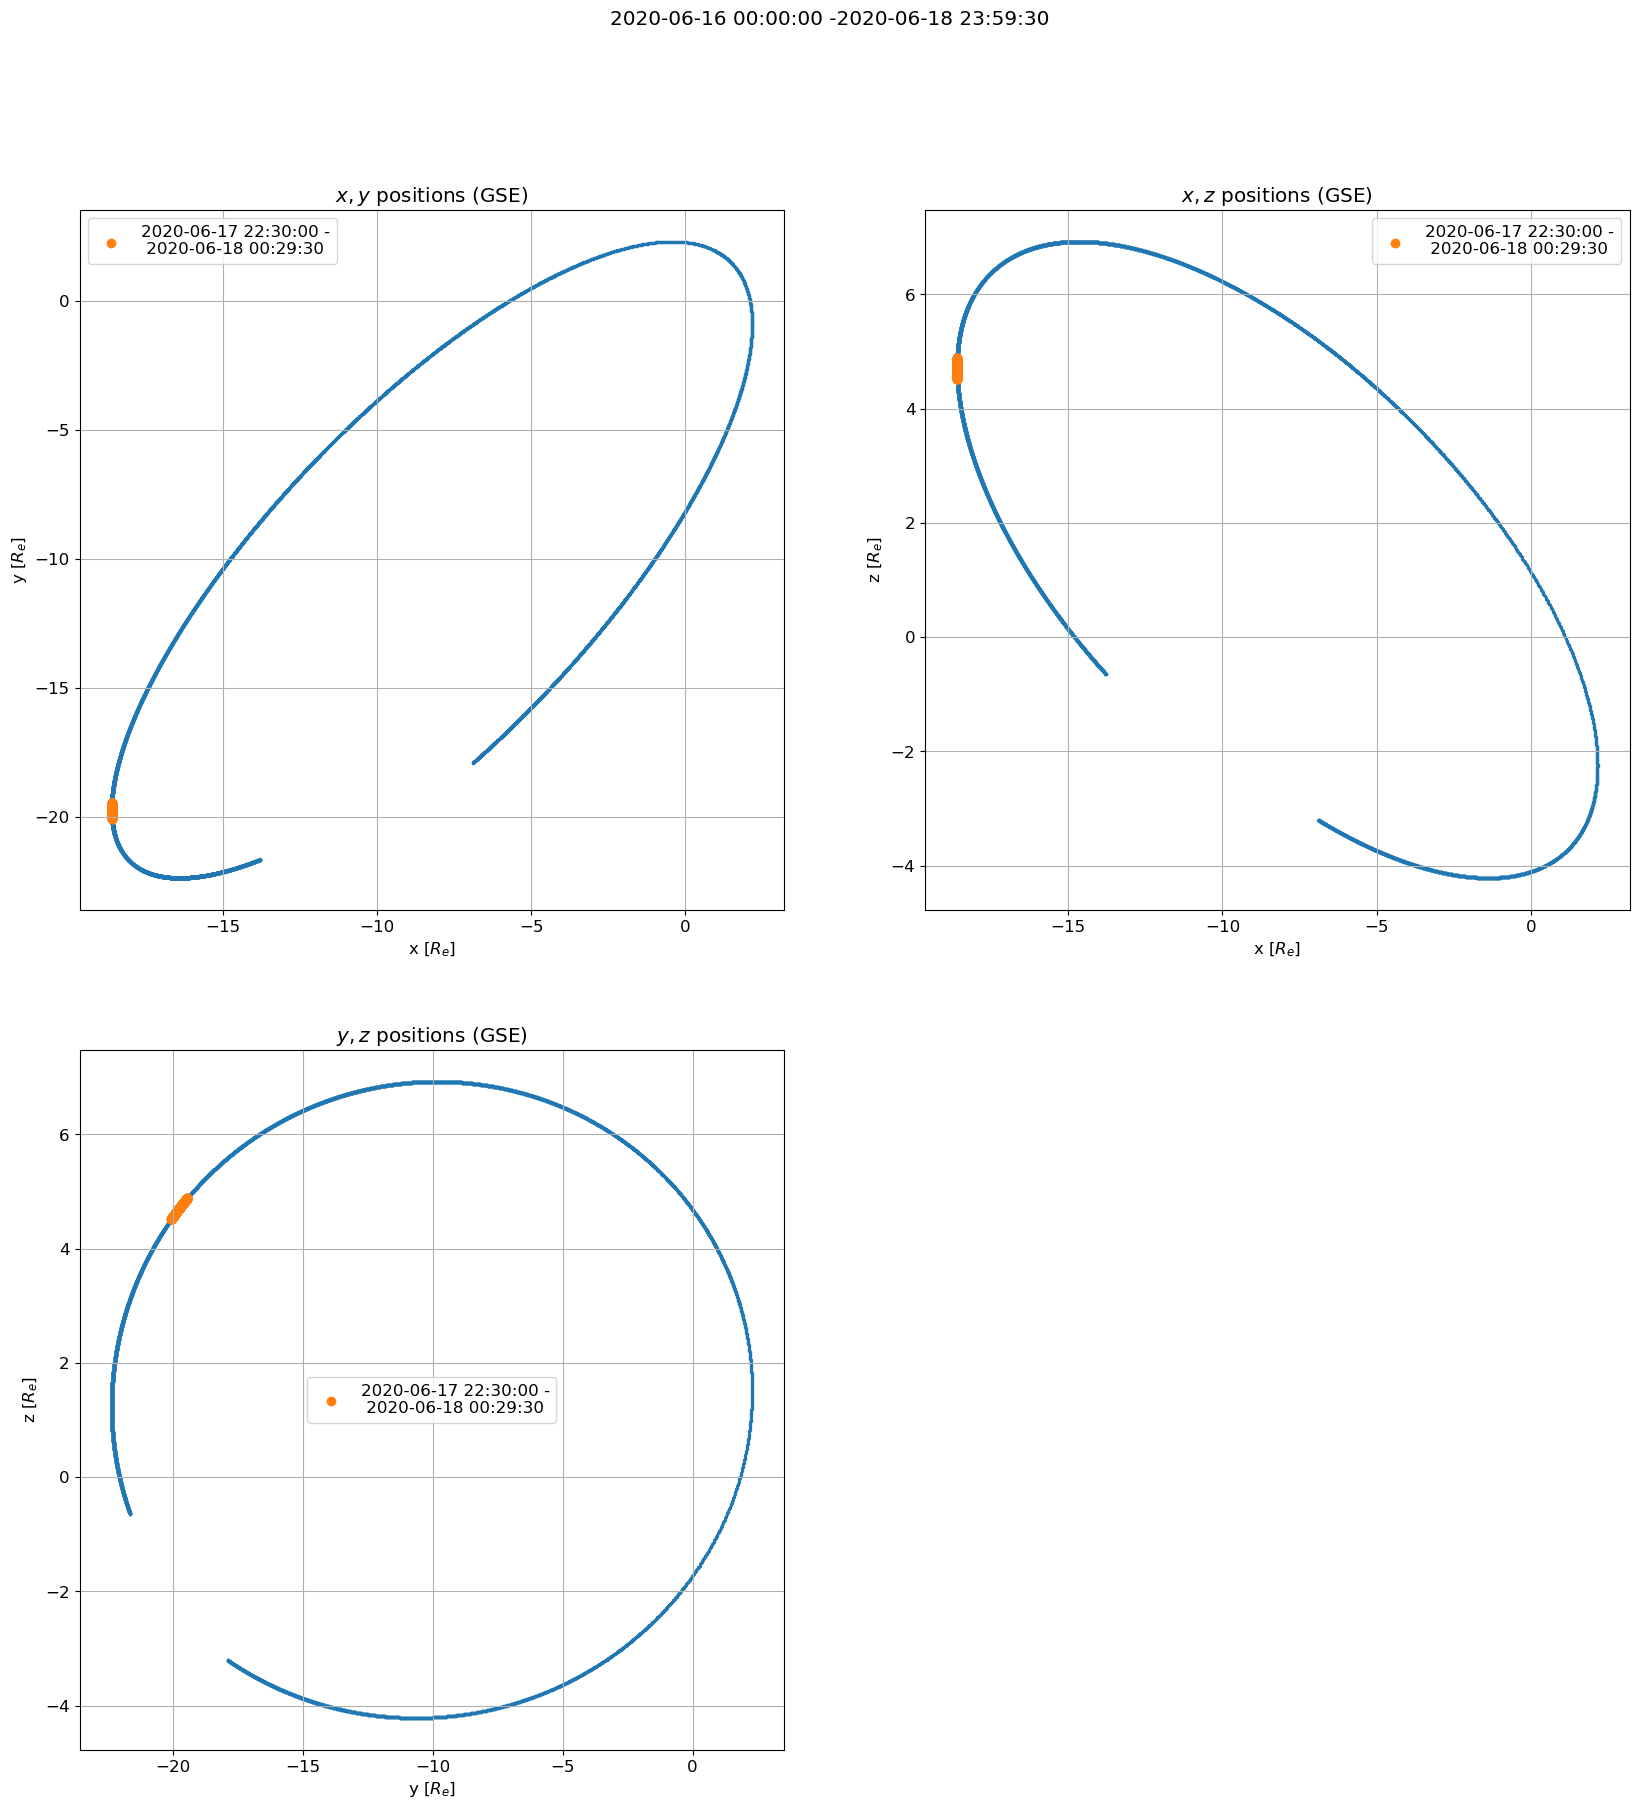

In [46]:
# plot the whole trajectory and highlight the section we're looking at
# KH instabilities occured from trange = ['2020-06-17/20:00:00','2020-06-18/03:20:00']

# create a nicely formatted string date for plots
date1 = Pt_short_timestamp[0].strftime("%Y-%m-%d %H:%M:%S")
date2 = Pt_short_timestamp[-1].strftime("%Y-%m-%d %H:%M:%S")


# create a nicely formatted string date for filenames
date3 = Pt_short_timestamp[0].strftime("%Y-%m-%d-%H-%M-%S")
date4= Pt_short_timestamp[-1].strftime("%Y-%m-%d-%H-%M-%S")


pd.to_datetime(MMS1_pos['Pt'],unit='s')
# create a nicely formatted string date spanning entire time period
date5 = pd.to_datetime(MMS1_pos['Pt'][0],unit='s')
date6 = pd.to_datetime(MMS1_pos['Pt'][-1],unit='s')


fig = plt.figure(figsize=[20,20])
fig.suptitle(r'%s -%s'%(date5,date6))

ax1 = fig.add_subplot(2, 2, 1)
p1 = plt.scatter(MMS1_pos['Px']/R_E,MMS1_pos['Py']/R_E,s=2)
plt.Circle(( 0 , 0 ), R_E )
ax1.grid()
ax1.set_title(r'$x,y$ positions (GSE)')
ax1.set_xlabel('x [$R_e$]')
ax1.set_ylabel('y [$R_e$]')
p11=plt.scatter(MMS1_pos['Px'][index_st_P:index_end_P]/R_E,MMS1_pos['Py'][index_st_P:index_end_P]/R_E)
ax1.legend([p11],['%s -\n %s'%(date1,date2)])
# ax1.set_xlim([0.0,-20])
# ax1.set_ylim([0,-23])


ax2 = fig.add_subplot(2, 2, 2)
p2 = plt.scatter(MMS1_pos['Px']/R_E,MMS1_pos['Pz']/R_E,s=2)
ax2.grid()
ax2.set_title(r'$x,z$ positions (GSE)')
ax2.set_xlabel('x [$R_e$]')
ax2.set_ylabel('z [$R_e$]')
p22=plt.scatter(MMS1_pos['Px'][index_st_P:index_end_P]/R_E,MMS1_pos['Pz'][index_st_P:index_end_P]/R_E)
plt.Circle(( 0 , 0 ), R_E )
ax2.legend([p22],['%s -\n %s'%(date1,date2)])




ax3 = fig.add_subplot(2, 2, 3)
p3=plt.scatter(MMS1_pos['Py']/R_E,MMS1_pos['Pz']/R_E,s=2)
p4=plt.scatter(MMS1_pos['Py'][index_st_P:index_end_P]/R_E,MMS1_pos['Pz'][index_st_P:index_end_P]/R_E)
plt.Circle(( 0 , 0 ), R_E )
ax3.grid()
ax3.set_title(r'$y,z$ positions (GSE)')
ax3.set_xlabel('y [$R_e$]')
ax3.set_ylabel('z [$R_e$]')
ax3.legend([p4],['%s -\n %s'%(date1,date2)])


if save_figs == True:
    fig.savefig('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/images/Orbit_plot_%s_%s' %(date3,date4))

In [47]:

float_formatter = "{:.2f}".format



# take tick labels that were in original km (not divided by Earth's radius) and convert to km vals divided by Earth's radius
def change_tick_labels(xticklabels, yticklabels):
    new_x_labels=[]
    new_y_labels=[]
    for i in range(len(xticklabels)):
        a = str(xticklabels[i])
        a = a.replace('Text(', '')
        a = a.replace(')', '')
        #print(a)
        a = a.split(',')
        #print(a)
        r = float(a[0])/R_E
        new_x_labels.append(float_formatter(r))

        
    for i in range(len(yticklabels)):
        b = str(yticklabels[i])
        b = b.replace('Text(', '')
        b = b.replace(')', '')
        #print(b)
        b = b.split(',')
        #print(b)
        rb = float(b[1])/R_E
        new_y_labels.append(float_formatter(rb))
    return new_x_labels, new_y_labels


# Bx2 = np.array(Bx_short[closest_indices_B])
# Bx_norm = 2*((Bx2 - min(Bx2))/(max(Bx2)-min(Bx2)))-1





# # take normalized position data values, convert back to actual values
# def change_tick_labels_from_norm(xticklabels, yticklabels):
#     new_x_labels=[]
#     new_y_labels=[]
#     for i in range(len(xticklabels)):
#         # the string of the x axis tick label
#         a = str(xticklabels[i])
#         a = a.replace('Text(', '')
#         a = a.replace(')', '')
#         #print(a)
#         a = a.split(',')
#         #print(a)
#         r = ((a+1)/2)*(max(Px2)-min(Px2))+min(Px2)
#         new_x_labels.append(float_formatter(r))

        
#     for i in range(len(yticklabels)):
#         b = str(yticklabels[i])
#         b = b.replace('Text(', '')
#         b = b.replace(')', '')
#         #print(b)
#         b = b.split(',')
#         #print(b)
#         rb = float(b[1])/R_E
#         new_y_labels.append(float_formatter(rb))
#     return new_x_labels, new_y_labels

# P1_x_labels,P1_y_labels = change_tick_labels(ax1.get_xticklabels(),ax1.get_yticklabels())
# P2_x_labels,P2_y_labels = change_tick_labels(ax2.get_xticklabels(),ax2.get_yticklabels())
# P3_x_labels,P3_y_labels = change_tick_labels(ax3.get_xticklabels(),ax3.get_yticklabels())





# new= 

# print(Px_norm)

# print(new/R_E)

# print('range of b-field', max(Bx3))


def change_vmag_cbar_labs(vmag_cbar_labels):
    new_vmag_cbar_labels=[]
    for i in range(len(vmag_cbar_labels)):
        a = str(vmag_cbar_labels[i])
        a = a.replace('Text(', '')
        a = a.replace(')', '')
        #print(a)
        a = a.split(',')
        #print(a)
        r = float(a[1])
        t = '{:.1f}'.format(r)
        new_vmag_cbar_labels.append(t)
    return new_vmag_cbar_labels



# use cbar4.ax.get_yticklabels(), etc and give it what you multiplied the bmag array by
def change_bmag_cbar_labs(bmag_cbar_labels,multiplier):
    new_bmag_cbar_labels=[]
    for i in range(len(bmag_cbar_labels)):
        a = str(bmag_cbar_labels[i])
        a = a.replace('Text(', '')
        a = a.replace(')', '')
        #print(a)
        a = a.split(',')
        #print(a)
        r = float(a[1])/multiplier
        t = '{:.1f}'.format(r)
        new_bmag_cbar_labels.append(t)
    return new_bmag_cbar_labels

In [48]:

Vx2 = np.array(Vx_short[closest_indices_V])

#print(Vx2)
Vx_norm = 2*((Vx2 - min(Vx2))/(max(Vx2)-min(Vx2)))-1


#print(Vx_norm)
Vy2 = np.array(Vy_short[closest_indices_V])
Vy_norm = 2*((Vy2 - min(Vy2))/(max(Vy2)-min(Vy2)))-1


Vz2 = np.array(Vz_short[closest_indices_V])
Vz_norm = 2*((Vz2 - min(Vz2))/(max(Vz2)-min(Vz2)))-1



Px2 = np.array(Px_short)
Px_norm = 2*((Px2 - min(Px2))/(max(Px2)-min(Px2)))-1

Py2 = np.array(Py_short)
Py_norm = 2*((Py2 - min(Py2))/(max(Py2)-min(Py2)))-1


Pz2 = np.array(Pz_short)
Pz_norm = 2*((Pz2 - min(Pz2))/(max(Pz2)-min(Pz2)))-1



#print(len(Vx_norm))

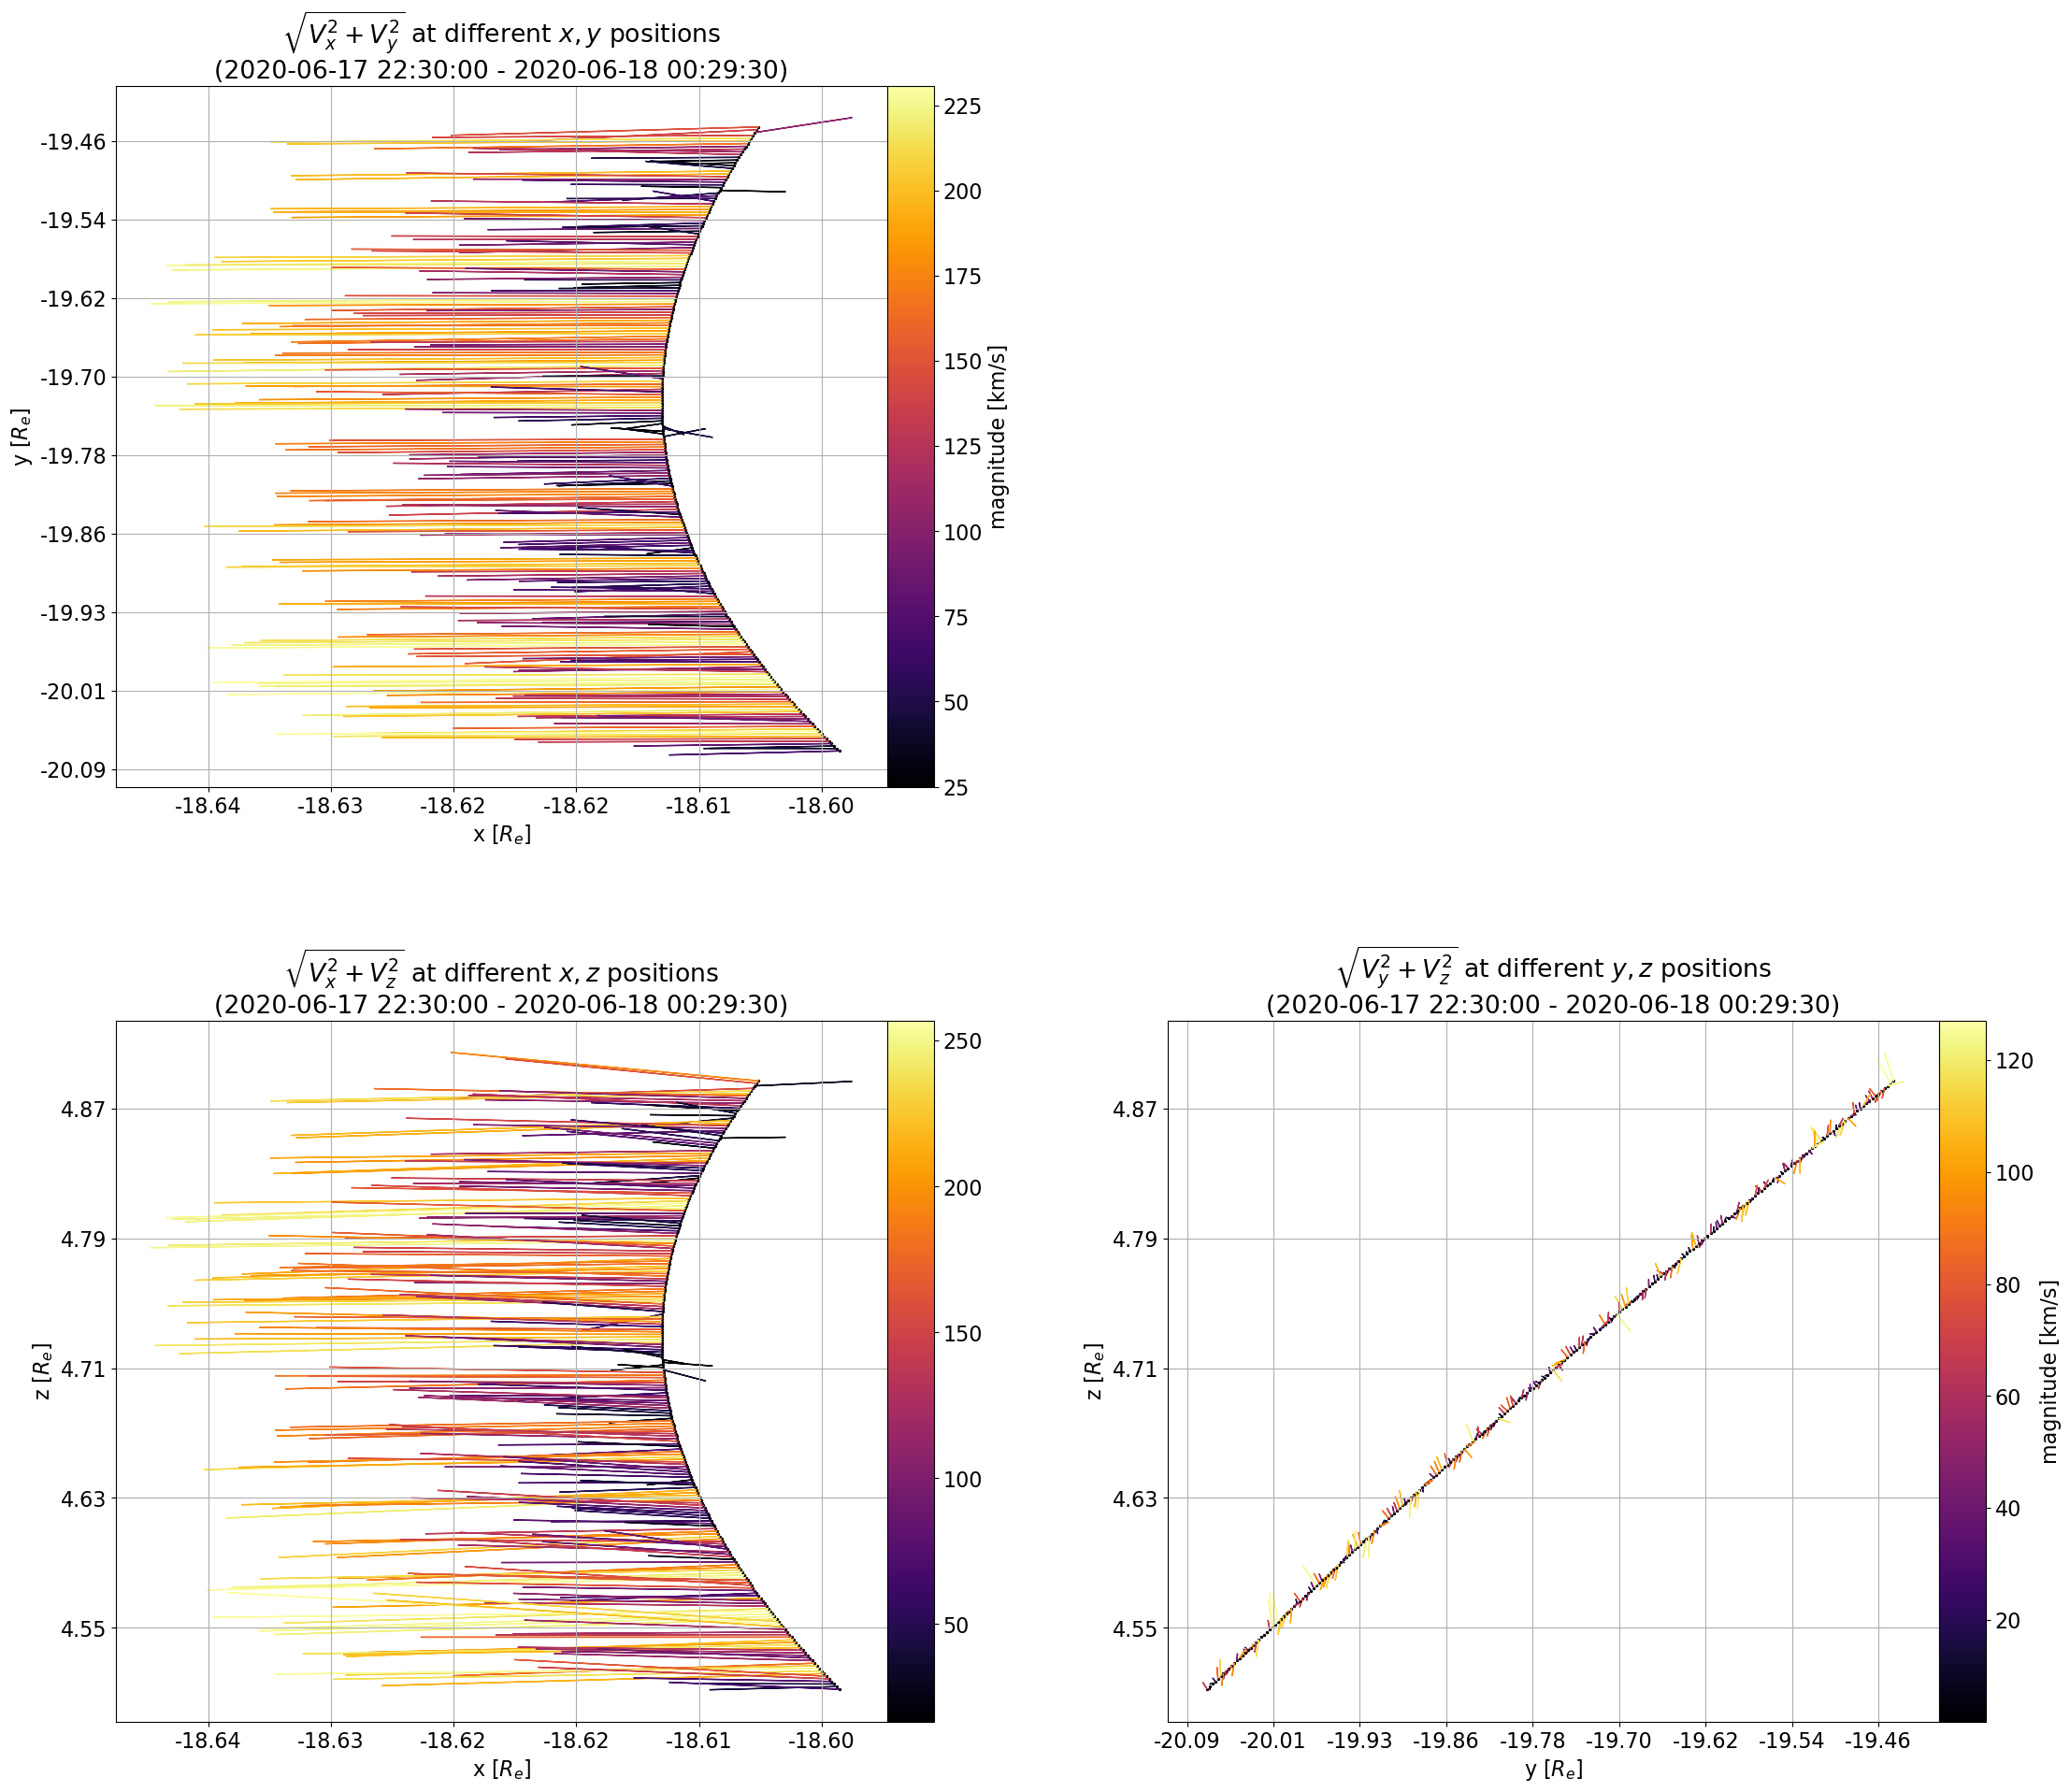

In [49]:
########################################################################
#
#  
# Plot velocity vectors on orbit trajectory WITHOUT normalizing values
#
#
#######################################################################


#def plot_velocity_vec_orbit_trajectory(Vx,Vy,Vz,Px,Py,Pz,Normalize)
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(25,25))

ax4 = fig.add_axes([0.1,0.6,0.33,0.3])
axc4 = fig.add_axes([0.43,0.6,0.02,0.3])

ax5 = fig.add_axes([0.1,0.2,0.33,0.3])
axc5 = fig.add_axes([0.43,0.2,0.02,0.3])

ax6 = fig.add_axes([0.55,0.2,0.33,0.3])
axc6 = fig.add_axes([0.88,0.2,0.02,0.3])

cmap = plt.cm.get_cmap("inferno")

colls = np.linspace(0,1, num=len(Px2))
rgba = cmap(colls)



# TO USE SPECIFIED NORMALIZED VALUES FOR VELOCITY UNCOMMENT FOLLOWING LINES:

vmag1 = np.sqrt(Vx2**2+Vy2**2)
cNorm4 = colors.Normalize(vmin = min(vmag1), vmax = max(vmag1))
scalarMap4 = cmx.ScalarMappable(cmap=cmap,norm=cNorm4)  
vmag1_sorted = np.sort(vmag1)
colorVal4 = np.array(scalarMap4.to_rgba(vmag1_sorted))

vmag2 = np.sqrt(Vx2**2+Vz2**2)
vmag2_nonorm = np.sqrt(Vx2**2+Vz2**2)
cNorm5 = colors.Normalize(vmin = min(vmag2), vmax = max(vmag2))
scalarMap5 = cmx.ScalarMappable(cmap=cmap,norm=cNorm5)  
vmag2_sorted = np.sort(vmag2)
colorVal5 = np.array(scalarMap5.to_rgba(vmag2_sorted))


vmag3 = np.sqrt(Vy2**2+Vz2**2)
vmag3_nonorm = np.sqrt(Vy2**2+Vz2**2)
cNorm6 = colors.Normalize(vmin = min(vmag3), vmax = max(vmag3))
scalarMap6 = cmx.ScalarMappable(cmap=cmap,norm=cNorm6)  
vmag3_sorted = np.sort(vmag3)
colorVal6 = np.array(scalarMap6.to_rgba(vmag3_sorted))

bb1=[]
bb2=[]
bb3=[]
for i in range(len(Px2)):
    #take value of vmag and find where its equal in the vmag sorted array, 
#     take that index and set the color equal to it    
    dd1 = np.sqrt(Vx2[i]**2+Vy2[i]**2)
    dd2 = np.sqrt(Vx2[i]**2+Vz2[i]**2)
    dd3 = np.sqrt(Vy2[i]**2+Vz2[i]**2)
    bb1 = np.where(vmag1_sorted==dd1)
    bb2 = np.where(vmag2_sorted==dd2)
    bb3 = np.where(vmag3_sorted==dd3)
    
    
    
    # I have no idea why sometimes np.where can't find the velocity magnitude in the sorted array 
    # of those SAME velocity magnitudes. 
    # Therefore, I set those empty values to some value (0)to plot a color.
    if any(bb1) != True:
        bb1 = 0
        
    if any(bb2)!= True:
        bb2 = 0
    if any(bb3)!=True:
        bb3 = 0

    ax4.scatter(Px2[i],Py2[i],s=2,color='k')
    ax4.arrow(Px2[i],Py2[i],Vx2[i],Vy2[i],head_width=0.05, head_length=0.05,color=rgba[bb1])
    ax4.grid(True)

    ax5.scatter(Px2[i],Pz2[i],s=2,color='k')
    ax5.arrow(Px2[i],Pz2[i],Vx2[i],Vz2[i],head_width=0.05, head_length=0.05,color=rgba[bb2])
    ax5.grid(True)
    
    ax6.scatter(Py2[i],Pz2[i],s=2,color='k')
    ax6.arrow(Py2[i],Pz2[i],Vy2[i],Vz2[i],head_width=0.05, head_length=0.05,color=rgba[bb3])
    ax6.grid(True)


cbar4 = mpl.colorbar.ColorbarBase(axc4,
                                  cmap=cmap, norm=cNorm4, orientation='vertical',label='magnitude [km/s]') 


cbar5 = mpl.colorbar.ColorbarBase(axc5,
                                  cmap=cmap, norm=cNorm5, orientation='vertical') 

cbar6 = mpl.colorbar.ColorbarBase(axc6,
                                  cmap=cmap, norm=cNorm6, orientation='vertical',label='magnitude [km/s]') 





ax4.set_title(r'$\sqrt{V_x^2+V_y^2}$ at different $x,y$ positions' +'\n' + '(%s - %s)'%(date1,date2) )
ax4.set_xlabel('x [$R_e$]')
ax4.set_ylabel('y [$R_e$]')


ax5.set_title(r'$\sqrt{V_x^2+V_z^2}$ at different $x,z$ positions' +'\n' + '(%s - %s)'%(date1,date2) )
ax5.set_xlabel('x [$R_e$]')
ax5.set_ylabel('z [$R_e$]')


ax6.set_title(r'$\sqrt{V_y^2+V_z^2}$ at different $y,z$ positions' +'\n' + '(%s - %s)'%(date1,date2) )
ax6.set_xlabel('y [$R_e$]')
ax6.set_ylabel('z [$R_e$]')


# convert normalized position values back to actual values, 
# normss = np.linspace(0.0,1,num=8)

# Px_labels =[]
# Py_labels =[]
# Pz_labels =[]
# for i in normss:
#     Px_labels.append((((i+1)/2)*(Px2.max()-Px2.min())+Px2.min())/R_E)
#     Py_labels.append((((i+1)/2)*(Py2.max()-Py2.min())+Py2.min())/R_E)
#     Pz_labels.append((((i+1)/2)*(Pz2.max()-Pz2.min())+Pz2.min())/R_E)


# Px_labels = ['{:.3f}'.format(elem) for elem in Px_labels]
# Py_labels = ['{:.3f}'.format(elem) for elem in Py_labels]
# Pz_labels = ['{:.3f}'.format(elem) for elem in Pz_labels]



ax4_x_lab, ax4_y_lab = change_tick_labels(ax4.get_xticklabels(),ax4.get_yticklabels() )
ax5_x_lab, ax5_y_lab = change_tick_labels(ax5.get_xticklabels(),ax5.get_yticklabels() )
ax6_x_lab, ax6_y_lab  = change_tick_labels(ax6.get_xticklabels(),ax6.get_yticklabels() )

ax4.set_xticklabels(ax4_x_lab)
ax4.set_yticklabels(ax4_y_lab)

ax5.set_xticklabels(ax5_x_lab)
ax5.set_yticklabels(ax5_y_lab)

ax6.set_xticklabels(ax6_x_lab)
ax6.set_yticklabels(ax6_y_lab)

# print(cbar4.ax.get_yticklabels())

# print(cbar5.ax.get_yticklabels())

# print(cbar6.ax.get_yticklabels())




# cbar4.set_ticklabels(vmag1_cbar_labels)

# cbar5.set_ticklabels(vmag2_cbar_labels)


# cbar6.set_ticklabels(vmag3_cbar_labels)
#

plt.show()

if save_figs == True:
    fig.savefig('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/images/Velocity_vectors_on_orbit_plot_%s_%s' %(date3,date4))

In [50]:
########################################################################
#
#  
# Make histograms of values
#
#
#######################################################################

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(2, 2, 1)
# ax1.hist(Vx2)

# ax2 = fig1.add_subplot(2, 2, 2)
# ax2.hist(Vy2)

# ax3 = fig1.add_subplot(2, 2, 3)
# ax3.hist(Vz2)

In [51]:
bmag_multiplier = 15


Bx2 = np.array(Bx_short[closest_indices_B])
#Bx_norm = 2*((Bx2 - min(Bx2))/(max(Bx2)-min(Bx2)))-1
Bx_norm = Bx2*bmag_multiplier



By2 = np.array(By_short[closest_indices_B])
#By_norm = 2*((By2 - min(By2))/(max(By2)-min(By2)))-1

By_norm = By2*bmag_multiplier


Bz2 = np.array(Bz_short[closest_indices_B])
#Bz_norm = 2*((Bz2 - min(Bz2))/(max(Bz2)-min(Bz2)))-1

Bz_norm = Bz2*bmag_multiplier
#print(Px_norm)

Px2 = np.array(Px_short)

#Px_norm=np.abs(Px2/10000)
Px_norm = Px2

#Px_norm = 2*((Px2 - min(Px2))/(max(Px2)-min(Px2)))-1

Py2 = np.array(Py_short)
Py_norm = Py2
#Py_norm = 2*((Py2 - min(Py2))/(max(Py2)-min(Py2)))-1

#Py_norm=np.abs(Py2/10000)

Pz2 = np.array(Pz_short)
Pz_norm = Pz2
#Pz_norm = 2*((Pz2 - min(Pz2))/(max(Pz2)-min(Pz2)))-1

#Pz_norm=np.abs(Pz2/10000)



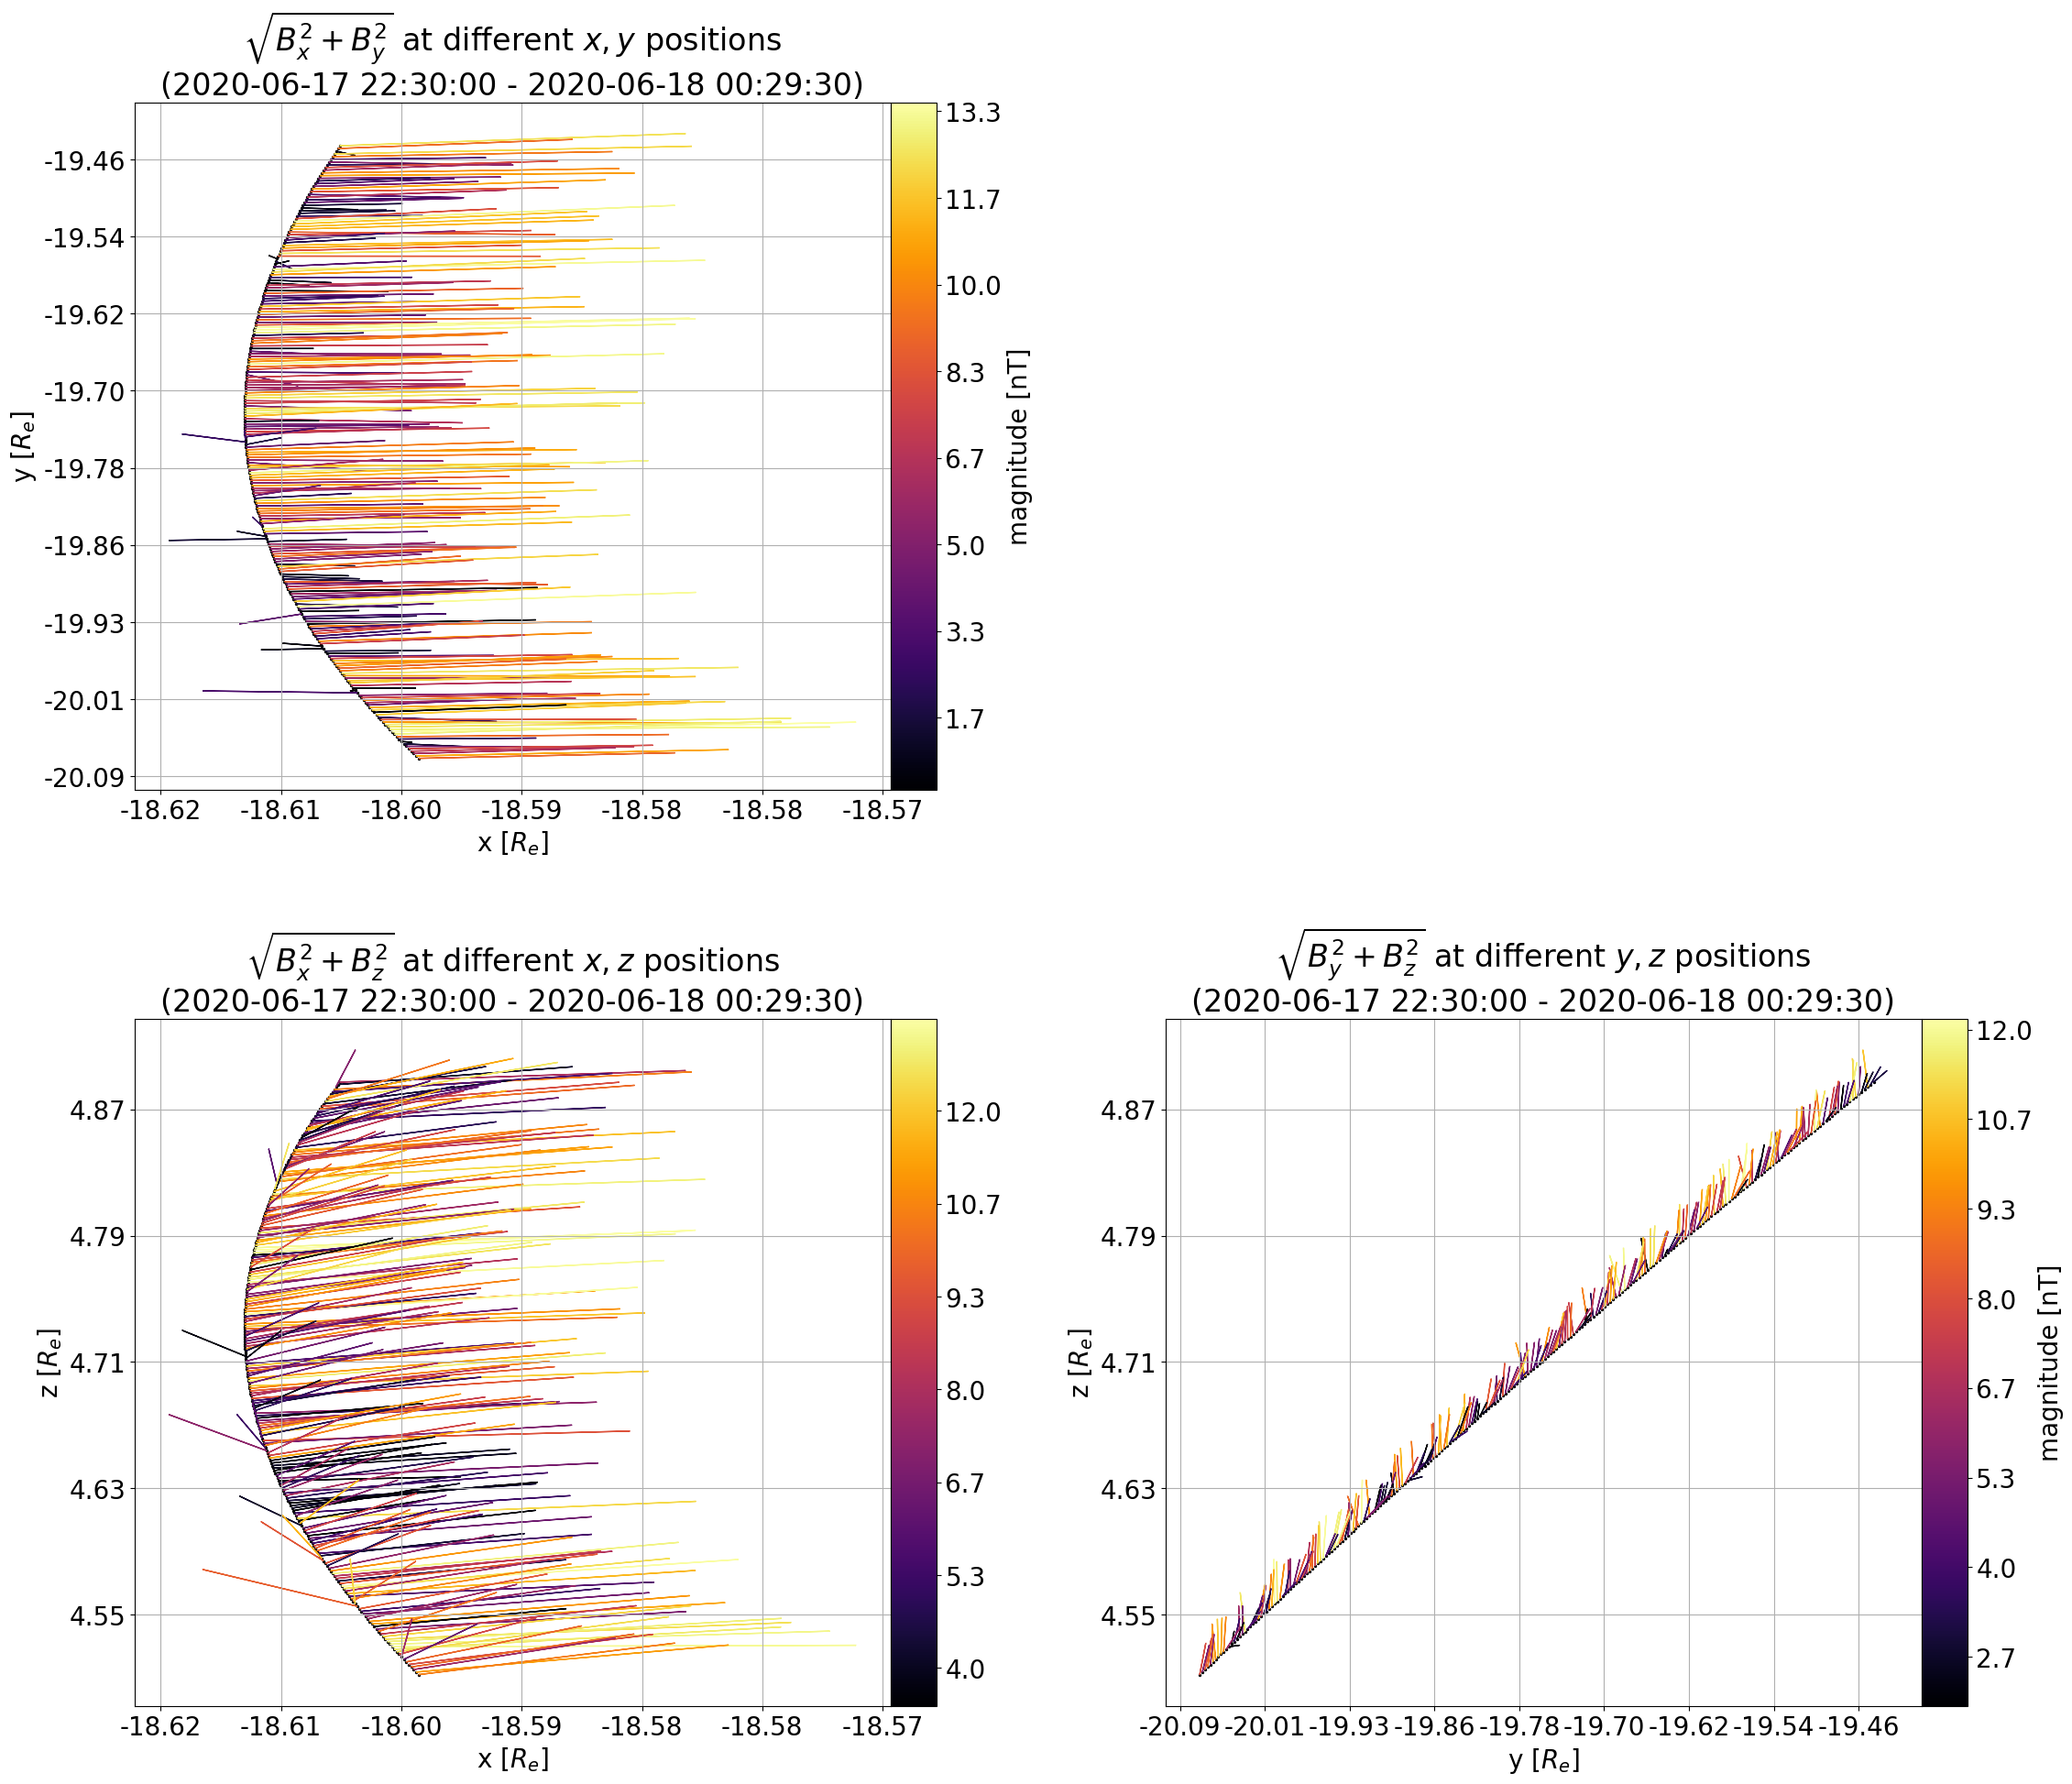

In [52]:
#################################################################
#
#  
# Plot B-field vectors on orbit trajectory
#
#
#################################################################

plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(25,25))

ax4 = fig.add_axes([0.1,0.6,0.33,0.3])
axc4 = fig.add_axes([0.43,0.6,0.02,0.3])

ax5 = fig.add_axes([0.1,0.2,0.33,0.3])
axc5 = fig.add_axes([0.43,0.2,0.02,0.3])

ax6 = fig.add_axes([0.55,0.2,0.33,0.3])
axc6 = fig.add_axes([0.88,0.2,0.02,0.3])

cmap = plt.cm.get_cmap("inferno")

colls = np.linspace(0,1, num=len(Px2))
rgba = cmap(colls)

bmag1 = np.sqrt(Bx_norm**2+By_norm**2)
#bmag1_nonorm = np.sqrt(Bx2**2+By2**2)



cNorm4 = colors.Normalize(vmin = min(bmag1), vmax = max(bmag1))
scalarMap4 = cmx.ScalarMappable(cmap=cmap,norm=cNorm4)  
bmag1_sorted = np.sort(bmag1)
colorVal4 = np.array(scalarMap4.to_rgba(bmag1_sorted))

bmag2 = np.sqrt(Bx_norm**2+Bz_norm**2)
#bmag2_nonorm = np.sqrt(Bx2**2+Bz2**2)
cNorm5 = colors.Normalize(vmin = min(bmag2), vmax = max(bmag2))
scalarMap5 = cmx.ScalarMappable(cmap=cmap,norm=cNorm5)  
bmag2_sorted = np.sort(bmag2)
colorVal5 = np.array(scalarMap5.to_rgba(bmag2_sorted))


bmag3 = np.sqrt(By_norm**2+Bz_norm**2)
#bmag3_nonorm = np.sqrt(By2**2+Bz2**2)
cNorm6 = colors.Normalize(vmin = min(bmag3), vmax = max(bmag3))
scalarMap6 = cmx.ScalarMappable(cmap=cmap,norm=cNorm6)  
bmag3_sorted = np.sort(bmag3)
colorVal6 = np.array(scalarMap6.to_rgba(bmag3_sorted))


# print(len(bmag1))



# print(bmag1[1000:1440])

# print(Pt_short_timestamp[1000])
# print(Pt_short_timestamp[1439])
# # exponential v-vec into exponential 

bb1=[]
bb2=[]
bb3=[]
for i in range(len(Px_norm)):
    #take value of bmag and find where its equal in the bmag sorted array, 
#     take that index and set the color equal to it    
    dd1 = np.sqrt(Bx_norm[i]**2+By_norm[i]**2)
    dd2 = np.sqrt(Bx_norm[i]**2+Bz_norm[i]**2)
    dd3 = np.sqrt(By_norm[i]**2+Bz_norm[i]**2)
    bb1 = np.where(bmag1_sorted==dd1)
    bb2 = np.where(bmag2_sorted==dd2)
    bb3 = np.where(bmag3_sorted==dd3)
    
    
    
    # I have no idea why sometimes np.where can't find the velocity magnitude in the sorted array of those velocity magnitudes. 
    # you have to set those empty values to some value so you can plot a color.
    # sometimes np.where returns an empty array when no 
    if any(bb1) != True:
        bb1 = 0
    if any(bb2)!= True:
        bb2 = 0
    if any(bb3)!=True:
        bb3 = 0

    ax4.scatter(Px_norm[i],Py_norm[i],s=2,color='k')
    ax4.arrow(Px_norm[i],Py_norm[i],Bx_norm[i],By_norm[i],head_width=0.05, head_length=0.05,color=rgba[bb1])
    ax4.grid(True)

    ax5.scatter(Px_norm[i],Pz_norm[i],s=2,color='k')
    ax5.arrow(Px_norm[i],Pz_norm[i],Bx_norm[i],Bz_norm[i],head_width=0.05, head_length=0.05,color=rgba[bb2])
    ax5.grid(True)
    
    ax6.scatter(Py_norm[i],Pz_norm[i],s=2,color='k')
    ax6.arrow(Py_norm[i],Pz_norm[i],By_norm[i],Bz_norm[i],head_width=0.05, head_length=0.05,color=rgba[bb3])
    ax6.grid(True)

#cbar_ticks = [0.0,0.2,0.4,0.6,0.8,1.0,1.2]

cbar4 = mpl.colorbar.ColorbarBase(axc4,
                                  cmap=cmap, norm=cNorm4, orientation='vertical',label='magnitude [nT]') 


cbar5 = mpl.colorbar.ColorbarBase(axc5,
                                  cmap=cmap, norm=cNorm5, orientation='vertical') 

cbar6 = mpl.colorbar.ColorbarBase(axc6,
                                  cmap=cmap, norm=cNorm6, orientation='vertical',label='magnitude [nT]') 





ax4.set_title(r'$\sqrt{B_x^2+B_y^2}$ at different $x,y$ positions' +'\n' + '(%s - %s)'%(date1,date2) )
ax4.set_xlabel('x [$R_e$]')
ax4.set_ylabel('y [$R_e$]')
# ax4.set_xlim([-117950,-117925])
# ax4.set_ylim([-132000,-131500])

ax5.set_title(r'$\sqrt{B_x^2+B_z^2}$ at different $x,z$ positions' +'\n' + '(%s - %s)'%(date1,date2) )
ax5.set_xlabel('x [$R_e$]')
ax5.set_ylabel('z [$R_e$]')


ax6.set_title(r'$\sqrt{B_y^2+B_z^2}$ at different $y,z$ positions' +'\n' + '(%s - %s)'%(date1,date2) )
ax6.set_xlabel('y [$R_e$]')
ax6.set_ylabel('z [$R_e$]')


# convert normalized position values back to actual values, 
# normss = np.linspace(0.0,1,num=8)

# Px_labels =[]
# Py_labels =[]
# Pz_labels =[]
# for i in normss:
#     Px_labels.append((((i+1)/2)*(Px_norm.max()-Px_norm.min())+Px_norm.min())/R_E)
#     Py_labels.append((((i+1)/2)*(Py_norm.max()-Py_norm.min())+Py_norm.min())/R_E)
#     Pz_labels.append((((i+1)/2)*(Pz_norm.max()-Pz_norm.min())+Pz_norm.min())/R_E)


# Px_labels = ['{:.3f}'.format(elem) for elem in Px_labels]
# Py_labels = ['{:.3f}'.format(elem) for elem in Py_labels]
# Pz_labels = ['{:.3f}'.format(elem) for elem in Pz_labels]



ax4_x_lab, ax4_y_lab = change_tick_labels(ax4.get_xticklabels(),ax4.get_yticklabels() )
ax5_x_lab, ax5_y_lab = change_tick_labels(ax5.get_xticklabels(),ax5.get_yticklabels() )
ax6_x_lab, ax6_y_lab  = change_tick_labels(ax6.get_xticklabels(),ax6.get_yticklabels() )

ax4.set_xticklabels(ax4_x_lab)
ax4.set_yticklabels(ax4_y_lab)

ax5.set_xticklabels(ax5_x_lab)
ax5.set_yticklabels(ax5_y_lab)

ax6.set_xticklabels(ax6_x_lab)
ax6.set_yticklabels(ax6_y_lab)



cbar4.set_ticklabels(change_bmag_cbar_labs(cbar4.ax.get_yticklabels(),bmag_multiplier))
cbar5.set_ticklabels(change_bmag_cbar_labs(cbar5.ax.get_yticklabels(),bmag_multiplier))
cbar6.set_ticklabels(change_bmag_cbar_labs(cbar6.ax.get_yticklabels(),bmag_multiplier))
# print(cbar4.ax.get_yticklabels())

# print(cbar5.ax.get_yticklabels())

# print(cbar6.ax.get_yticklabels())



# cbar4.set_ticklabels(bmag1_cbar_labels)

# cbar5.set_ticklabels(bmag2_cbar_labels)


# cbar6.set_ticklabels(bmag3_cbar_labels)
#

plt.show()

if save_figs == True:
    fig.savefig('/Users/chle4971/OneDrive - LASP, University of Colorado/LASP-MacL4326/MMS/images/B_vectors_on_orbit_plot_%s_%s' %(date3,date4))


In [53]:
print(cbar4.ax.get_yticklabels())

print(cbar5.ax.get_yticklabels())

print(cbar6.ax.get_yticklabels())

[Text(1, 0.0, '0.0'), Text(1, 25.0, '1.7'), Text(1, 50.0, '3.3'), Text(1, 75.0, '5.0'), Text(1, 100.0, '6.7'), Text(1, 125.0, '8.3'), Text(1, 150.0, '10.0'), Text(1, 175.0, '11.7'), Text(1, 200.0, '13.3'), Text(1, 225.0, '15.0')]
[Text(1, 40.0, '2.7'), Text(1, 60.0, '4.0'), Text(1, 80.0, '5.3'), Text(1, 100.0, '6.7'), Text(1, 120.0, '8.0'), Text(1, 140.0, '9.3'), Text(1, 160.0, '10.7'), Text(1, 180.0, '12.0'), Text(1, 200.0, '13.3')]
[Text(1, 20.0, '1.3'), Text(1, 40.0, '2.7'), Text(1, 60.0, '4.0'), Text(1, 80.0, '5.3'), Text(1, 100.0, '6.7'), Text(1, 120.0, '8.0'), Text(1, 140.0, '9.3'), Text(1, 160.0, '10.7'), Text(1, 180.0, '12.0'), Text(1, 200.0, '13.3')]
